In [ ]:
#Milan Gomez Villalba 000428696
#Jérôme Somers 000442437

In [347]:
import numpy as np #Nous importons nos librairies
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot
%matplotlib inline
import math

In [348]:
#1.Nous allons calculer la position de chaque extremité de notre double pendule avec la méthode RK4.

In [349]:
def first_rk4(f,g,j,m, th10,th20,p10,p20, t0, stop, h): 
    # résout le systeme th1' = f(y(t)) où y(t) = (th1(t),th2(t),p1(t),p2(t)) et les conditions initiales y(t0) = (th10,th20,p10,p20)
    #                   th2' = g(y(t))
    #                   p1' = j(y(t))
    #                   p2' = m(y(t))
    th1_value = list([th10]) # listes dans lesquelles on sauvegardera nos valeurs
    th2_value = list([th20])
    th1 = th10
    th2 = th20
    p1 = p10
    p2 = p20
    t = t0
    #print('t0', t, 'y0', y)
    # on calcule les coefficient en même temps selon la méthode de Runge-Kutta
    for i in range(int((stop - t0)/h)):
        k1 = h*f(th1,th2,p1,p2)
        l1 = h*g(th1,th2,p1,p2)
        j1 = h*j(th1,th2,p1,p2)
        m1 = h*m(th1,th2,p1,p2)
        k2 = h*f( th1 + 1/2 * k1,th2 + 1/2 * l1,p1 + 1/2 * j1,p2 + 1/2 * m1)
        l2 = h*g( th1 + 1/2 * k1,th2 + 1/2 * l1,p1 + 1/2 * j1,p2 + 1/2 * m1)
        j2 = h*j( th1 + 1/2 * k1,th2 + 1/2 * l1,p1 + 1/2 * j1,p2 + 1/2 * m1)
        m2 = h*m( th1 + 1/2 * k1,th2 + 1/2 * l1,p1 + 1/2 * j1,p2 + 1/2 * m1)
        k3 = h*f( th1 + 1/2 * k2,th2 + 1/2 * l2,p1 + 1/2 * j2,p2 + 1/2 * m2)
        l3 = h*g( th1 + 1/2 * k2,th2 + 1/2 * l2,p1 + 1/2 * j2,p2 + 1/2 * m2)
        j3 = h*j( th1 + 1/2 * k2,th2 + 1/2 * l2,p1 + 1/2 * j2,p2 + 1/2 * m2)
        m3 = h*m( th1 + 1/2 * k2,th2 + 1/2 * l2,p1 + 1/2 * j2,p2 + 1/2 * m2)
        k4 = h*f( th1 +  k3, th2 +  l3, p1 +  j3, p2 +  m3)
        l4 = h*g( th1 +  k3, th2 +  l3, p1 +  j3, p2 +  m3)
        j4 = h*j( th1 +  k3, th2 +  l3, p1 +  j3, p2 +  m3)
        m4 = h*m( th1 +  k3, th2 +  l3, p1 +  j3, p2 +  m3)
        #print('k1', k1, l1, j1, m1)
        #print('k2', k2, l2, j2, m2)
        #print('k3', k3, l3, j3, m3)
        #print('k4', k4, l4, j4, m4)
        th1 += 1/6 * (k1 + 2*k2 + 2*k3 + k4)
        th2 += 1/6 * (l1 + 2*l2 + 2*l3 + l4)
        p1 += 1/6 * (j1 + 2*j2 + 2*j3 + j4)
        p2 += 1/6 * (m1 + 2*m2 + 2*m3 + m4)
        t += h
        th1_value.append(th1) # on sauvegarde nos valeur dans nos listes
        th2_value.append(th2)
        #print('t', t, 'th1', th1, 'th2', th2 ,'p1', p1 , 'p2', p2)
    return th1_value,th2_value

In [350]:
#Nous attribuons les valeurs aux constantes de nos équation.
G = 9.81 # la gravité
M = 1.000 # la masse de chaque barreau
L = 1.000 # la longueur de chaque barreau
#Nous défnissons nos équations du mouvement du pendule double trouvées sur le site: https://en.wikipedia.org/wiki/Double_pendulum
#Nos condition initiales sont theta1 = thetha2 = np.pi/2 , p1 = p2 = 0, t = 0 s, et le pas est de 0.001s
f = lambda th1,th2,p1,p2 : (6 /M*L**2) * (2*p1 - 3*np.cos(th1 - th2)*p2)/( 16 - 9*(np.cos(th1 - th2))**2) # d/dt(th1) = f(y)
g = lambda th1,th2,p1,p2 : (6 / M*L**2) * (8*p2 - 3*np.cos(th1 - th2)*p1)/( 16 - 9*(np.cos(th1 - th2))**2) # d/dt(th2) = g(y)
j = lambda th1,th2,p1,p2 : (-(M * L**2)/2) * (((6 /M*L**2) * ((2*p1 - 3*np.cos(th1 - th2)*p2)/( 16 - 9*(np.cos(th1 - th2))**2)))* ((6 / M*L**2) * ((8*p2 - 3*np.cos(th1 - th2)*p1)/( 16 - 9*(np.cos(th1 - th2))**2))) * np.sin(th1-th2) + (3*G/L)*np.sin(th1)) # d/dt(p1) = j(y)
m = lambda th1,th2,p1,p2 : (-(M * L**2)/2) * (-1*((6 /M*L**2) * ((2*p1 - 3*np.cos(th1 - th2)*p2)/( 16 - 9*(np.cos(th1 - th2))**2)))* ((6 / M*L**2) * ((8*p2 - 3*np.cos(th1 - th2)*p1)/( 16 - 9*(np.cos(th1 - th2))**2))) * np.sin(th1-th2) + (G/L)*np.sin(th2)) # d/dt(p2) = m(y)
th1_value , th2_value = first_rk4(f , g , j , m, np.pi/2, np.pi/2, 0.000, 0.000, 0.000, 20.000, 0.001)

In [351]:
#Nous trouvons la position (x1,y1) et (x2,y2) qui sont repectivement les extremité du barreau 1 et du barreau 2. A partir des angles thêta 1 et thêtha 2 et de la langueur L des barreaux
def get_xy(th1,th2,L):
    x1_value = list() #Nous créons des listes vides pour stocker nos valeurs
    y1_value = list()
    x2_value = list()
    y2_value = list()
    for i in range (len(th1)): #Nous éffectuons un changement de coordonnées polaires vers cartésiennes
        x1 = L*np.sin(th1[i])
        y1 = (-L) * np.cos(th1[i])
        x2 = L*(np.sin(th1[i]) + np.sin( th2[i]))
        y2 = -L*(np.cos(th1[i]) + np.cos( th2[i]))
        x1_value.append(x1)
        y1_value.append(y1)
        x2_value.append(x2)
        y2_value.append(y2)
    return x1_value, y1_value, x2_value , y2_value

In [352]:
x1_value, y1_value, x2_value , y2_value = get_xy(th1_value,th2_value,1) #Nous transformons nos angles thêta 1 et thêta 2 en position (x1,y1) et (x2,y2) et Nous les stockons dans des tableaux.
print('position de l extremité du 1er barreau après 20s',x1_value[-1],y1_value[-1])
print('position de l extremité du 2eme barreau après 20s:',x2_value[-1], y2_value[-1])

position de l extremité du 1er barreau après 20s 0.6626895585204422 -0.7488942175153854
position de l extremité du 2eme barreau après 20s: 0.06008964502838976 0.049149230085915874


In [353]:
#2.Nous allons calculer l'ordre de convergence de la méthode numérique.

In [354]:
def diff(th_coarse,th_fine,dt): #Nous calculons la différence de norme de th_coarse et th_fine
        N_coarse=len(th_coarse)  #th1_coarse et th2_coarse ont la même longueur
        N_fine=len(th_fine)  #th1_fine et th2_fine ont la même longueur
        th_coarse = np.asarray(th_coarse) #nous transformons nos listes en numpy array pour pouvoir les traiter commes des vecteurs
        th_fine = np.asarray(th_fine)
        ratio = math.ceil(N_fine/N_coarse)
        diff1 = dt * np.sum(np.abs(th_coarse - th_fine[::ratio]))
        return diff1

In [355]:
th1_finest , th2_finest = first_rk4(f , g , j , m, np.pi/2, np.pi/2, 0.000, 0.000, 0.000, 20.000, 0.0001) #Nous créons les valeurs th1 et th2 avec la plus grande précision
dt_value = [0.05,0.01,0.005,0.001,0.0005] #Nos pas dt à comparer
diff1_value = []
diff2_value = []
for i in range (len(dt_value)):
    th1_dt,th2_dt = first_rk4(f , g , j , m, np.pi/2, np.pi/2, 0.000, 0.000, 0.000, 20.000, dt_value[i])
    diff1_value.append(diff(th1_dt,th1_finest,dt_value[i]))
    diff2_value.append(diff(th2_dt,th2_finest,dt_value[i]))
print('d',diff1_value,'d2',diff2_value) #Le programme donne les listes des différences entre les différents pas 

d [15.958188274564145, 3.4364341307738573, 1.6170295853657803, 0.01706268504172328, 0.0011561449161888258] d2 [144.98081032481508, 20.16099258756825, 3.3110785020959463, 0.038230628865132926, 0.0026253214485911203]


In [356]:
#Nous avons pris les fonctions du cours pour faire le graphique.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

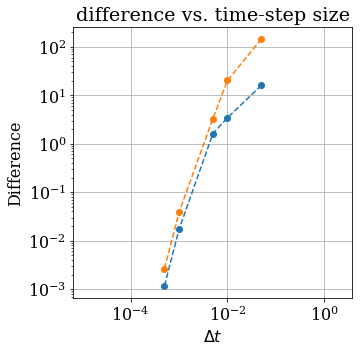

In [357]:
# Plot the difference versus the time-step size.
pyplot.figure(figsize=(5.0, 5.0))
pyplot.title('difference vs. time-step size')  # set the title
pyplot.xlabel('$\Delta t$')  # set the x-axis label
pyplot.ylabel('Difference')  # set the y-axis label
pyplot.grid()
pyplot.loglog(dt_value, diff1_value,
              color='C0', linestyle='--', marker='o')  # log-log plot
pyplot.loglog(dt_value, diff2_value,
              color='C1', linestyle='--', marker='o')  # log-log plot
pyplot.axis('equal');  # make axes scale equally

In [358]:
#Nous suivons le programme du cours pour calculer l'ordre de convergence de la methode numérique pour theta 1 et theta 2
r = 2
th1_medium , th2_medium = first_rk4(f , g , j , m, np.pi/2, np.pi/2, 0.000, 0.000, 0.000, 20.000, 0.001*r) 
th1_coarsest , th2_coarsest = first_rk4(f , g , j , m, np.pi/2, np.pi/2, 0.000, 0.000, 0.000, 20.000, 0.001*(r**2))
f2_f1 = diff(th1_medium,th1_value,0.001*r)
f3_f2 = diff(th1_coarsest,th1_medium,0.001*(r**2))
g2_g1 = diff(th2_medium,th2_value,0.001*r)
g3_g2 = diff(th2_coarsest,th2_medium,0.001*(r**2))
p1_conv = math.log(f3_f2 / f2_f1) / math.log(r)
p2_conv = math.log(g3_g2 / g2_g1) / math.log(r)
print('ordre de convergence pour l angle thetha 1 :', p1_conv,'ordre de convergence pour l angle thetha 2 :',p2_conv)

ordre de convergence pour l angle thetha 1 : 2.480925941559008 ordre de convergence pour l angle thetha 2 : 3.8622650507490017


In [359]:
#L'ordre de thetha 1 est 2 et l'ordre de thetha 2 est 4.

In [360]:
#3.Nous allons faire une animation du mouvement de notre double pendule.

In [361]:
def update_plot(n,x1_value,y1_value,x2_value,y2_value): #Fonction qui met à jour le graphique pour chaque instant t, on multiplie les indices par 10 parce qu'on prends un dt=0.01 plutot que dt=0.001 dans l'animation pour que la video charge plus rapidement
    line1.set_xdata(np.linspace(0.0,x1_value[n*10])) #Nous créons un intervalle 0 à notre valeur en x1 à l'instant t
    line1.set_ydata(np.linspace(0.0,y1_value[n*10])) #Nous créons un intervalle 0 à notre valeur en y1 à l'instant t
    line2.set_xdata(np.linspace(x1_value[n*10],x2_value[n*10])) #Nous créons un intervalle de notre valeur x1 à notre valeur en x2 à l'instant t
    line2.set_ydata(np.linspace(y1_value[n*10],y2_value[n*10])) #Nous créons un intervalle de notre valeur y1 à notre valeur en y2 à l'instant t

In [362]:
nt = int(20.000/0.01) # nombre de pas total de dt ,  nt change la précision mais permet de compiler la video plus vite. Si on change nt, on doit aussi changer l'indice dans la fonction update_plot
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt,fargs=(x1_value,y1_value,x2_value,y2_value),
                               interval=20)

In [363]:
HTML(anim.to_html5_video()) #La video prend environ 2 min a chargé.